# Tag Identification Using NLP

## Import necessary libarires

In [2]:
import urllib.request
from bs4 import BeautifulSoup
import nltk 
import matplotlib.pyplot as plt
import re

## Download Stopwords

In [3]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Fetch HTML from URL

In [4]:
response = urllib.request.urlopen('https://en.wikipedia.org/wiki/Tata_Group')
html = response.read()

## Parse HTML using BeautifulSoup

In [5]:
soup = BeautifulSoup(html, 'html5lib')
text = soup.get_text(strip = True)

## Tokenize text

In [6]:
tokens = text.split()

## Load stopwords once

In [7]:
stop_words = set(stopwords.words('english'))

##  Remove stopwords, digits, hyphens, and special characters using list comprehension

In [8]:
clean_tokens = [
    token for token in tokens
    if token.lower() not in stop_words and re.match("^[a-zA-Z]+$", token)
]

## Frequency distribution

In [9]:
freq = nltk.FreqDist(clean_tokens)

## Print the top 20 words and their frequencies

In [10]:
print("Top 20 Words:")
for word, count in freq.most_common(10):
    print(f"{word}: {count}")

Top 20 Words:
Tata: 80
original: 45
October: 21
India: 21
Group: 20
Indian: 15
companies: 13
Steel: 13
solid: 12
January: 12


## Plot the top 10 words

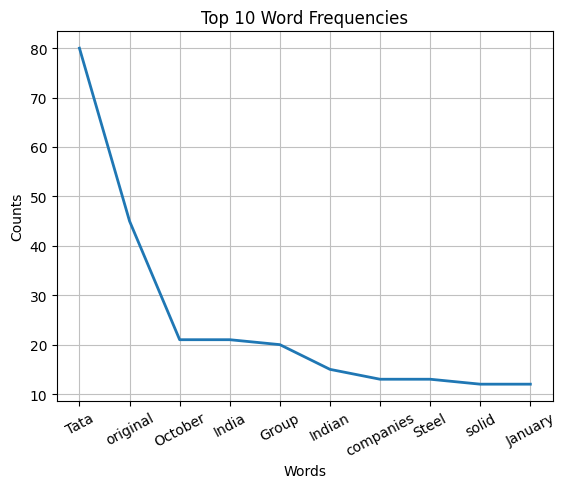

In [15]:
freq.plot(10, cumulative = False)
# Improve plot aesthetics
plt.xticks(rotation=28)
plt.title("Top 10 Word Frequencies")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.savefig("word_frequency_plot.png", dpi=300)
plt.show()